## 📈📉📊 ANALYSE EXPLORATOIRE DES DONNEES 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 
import os 
import sys
import warnings
import math

from sklearn.preprocessing import LabelEncoder

sys.path.append(os.path.abspath(".."))

In [30]:
#def datacleaning(dataframe): 
    # Séparer les colonnes numériques et catégoriques
    #cat_data_train = dataframe.select_dtypes(include=['object']).copy()
    #num_data_train = dataframe.select_dtypes(exclude=['object']).copy()

    # Imputation des valeurs manquantes
    #num_data_train.fillna(method='bfill', inplace=True)
    #num_data_train.fillna(method='ffill', inplace=True)  # Optionnel
    #cat_data_train = cat_data_train.apply(lambda x: x.fillna(x.mode()[0]))

    # Suppression d'une colonne spécifique si elle existe
    #if 'Loan_ID' in cat_data_train.columns:
        #cat_data_train.drop(columns=['Loan_ID'], inplace=True)

    # Concaténation des DataFrames nettoyés
    #df_cleaned = pd.concat([num_data_train, cat_data_train], axis=1)
    
    #return df_cleaned

In [2]:
path = os.getcwd()
chemin_repertoire = os.path.join(path, '../dataset')

# chemin des fichiers
chemin_train= os.path.join(chemin_repertoire, 'train_data.csv')

In [3]:
df_train = pd.read_csv(chemin_train) 
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
from cleaning_preprocess_ML.cleaning import datacleaning
df_cleaned = datacleaning(df_train)

c:\Users\NAZIFOU\Bank-loan-prediction\cleaning_preprocess_ML\cleaning.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data_train.fillna(method='bfill', inplace=True)


In [6]:
print("Valeur manquantes :", df_cleaned.isnull().sum().any())  

Valeur manquantes : False


In [7]:
df_cleaned.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,128.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3000,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000,0.0,141.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Gender             614 non-null    object 
 6   Married            614 non-null    object 
 7   Dependents         614 non-null    object 
 8   Education          614 non-null    object 
 9   Self_Employed      614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Notre base dataset propre contient 614 observations et 12 variables 
- 5 variables numériques (ApplicantIncome , CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_Historique)
- 6 variables catégorielles(Gender, Married, Dependents, Education, Self_Employed, Property_Are)
- 1 variables cible (Loan_Status)

### Statistiques et visualisation des données 

### I - Analyse univarié 

1- Les variables numériques 

In [16]:
df_cleaned.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.416938,342.410423,0.84202
std,6109.041673,2926.248369,84.917398,64.428629,0.36502
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


Distribution des variables 

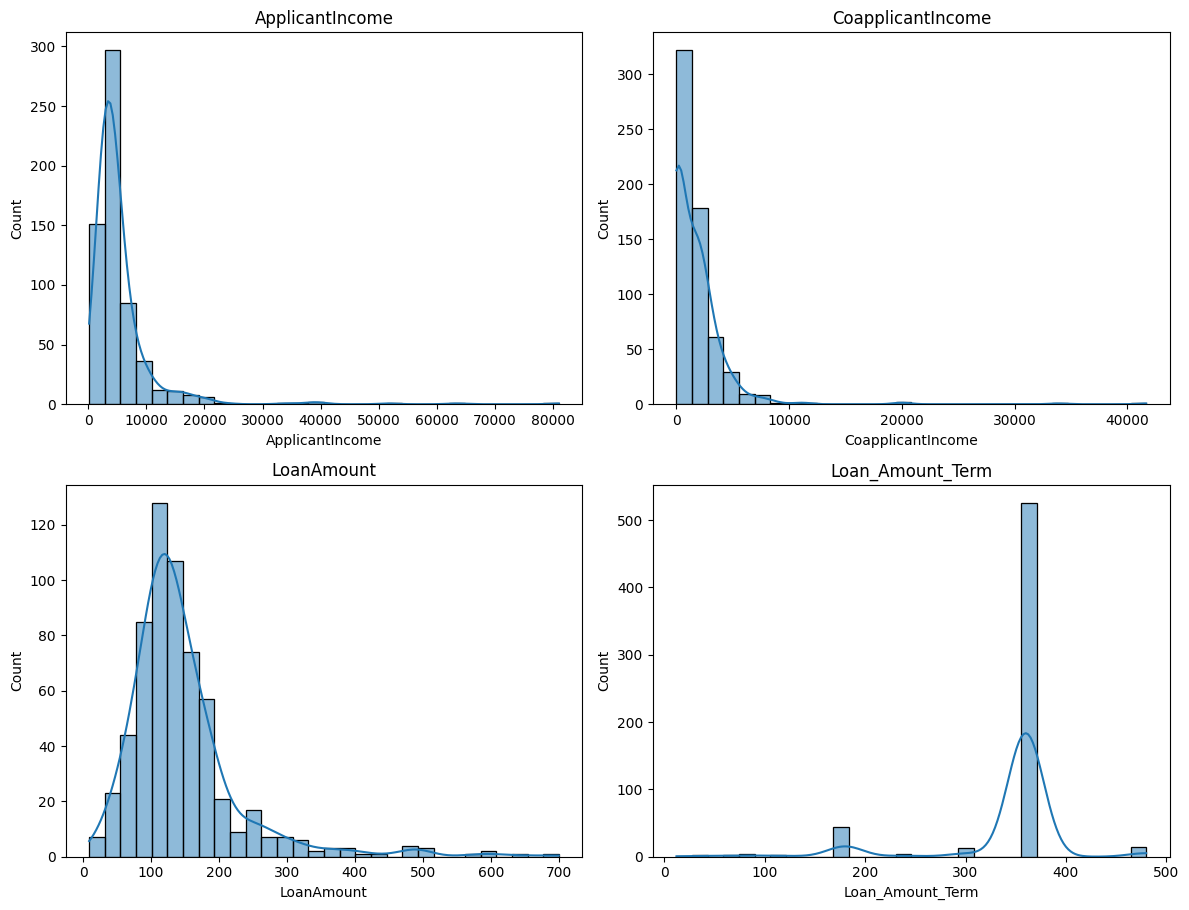

In [17]:
# Visualisation des données numériques

num_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Convertir en tableau 1D pour itérer plus facilement

for i, var in enumerate(num_vars):
    sns.histplot(df_cleaned[var], bins=30, kde=True, ax=axes[i])  
    axes[i].set_title(var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


2 - variables catégorielle

#### Variable cible  Loan_Status  (target)

In [24]:
target = df_cleaned['Loan_Status'] 

#target.value_counts().to_frame()

Le pourcentage de crédits accordés est: 68.73%
Le pourcentage de crédits refusés est: 31.27%


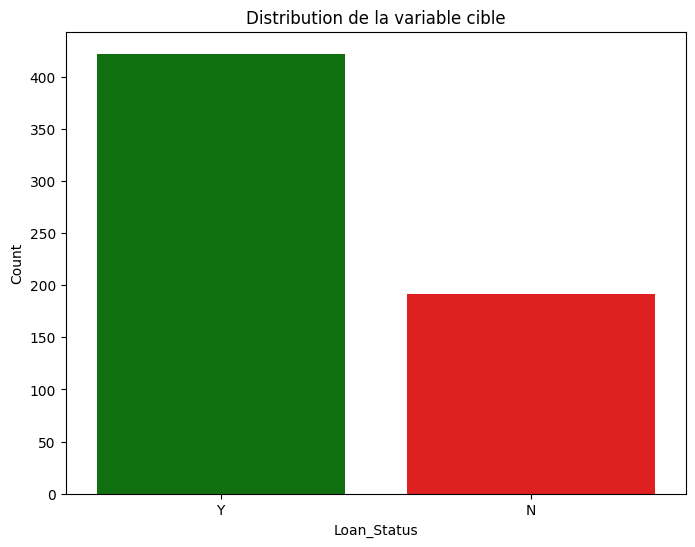

In [25]:
plt.figure(figsize=(8, 6))

sns.countplot(x=target, hue=target, palette=['green', 'red'], legend=False)

yes = target.value_counts()['Y'] / len(target) * 100
no = target.value_counts()['N'] / len(target) * 100

plt.title('Distribution de la variable cible')
plt.xlabel('Loan_Status')
plt.ylabel('Count')

print(f'Le pourcentage de crédits accordés est: {yes:.2f}%')
print(f'Le pourcentage de crédits refusés est: {no:.2f}%')

plt.show()

Les autres variables catégorielles 

In [29]:
df_cleaned.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

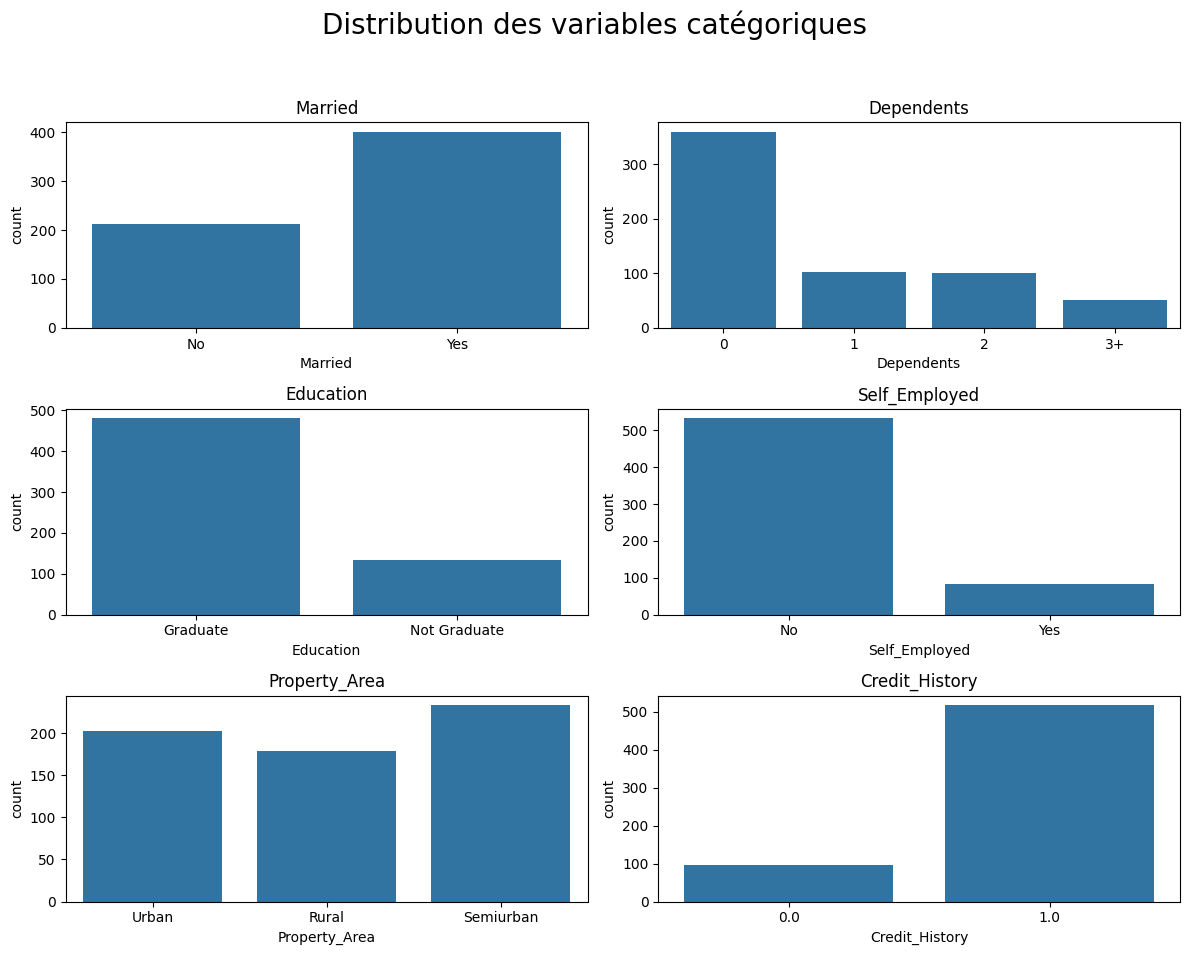

In [ ]:
# Visualisation des variables catégoriques
cat_vars = ['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_vars = len(cat_vars)

# Déterminer dynamiquement le nombre de lignes
rows = math.ceil(num_vars / 2)

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Transformer en liste 1D

fig.suptitle('Distribution des variables catégoriques', fontsize=20)

for i, var in enumerate(cat_vars):
    if var in df_cleaned.columns:
        sns.countplot(x=var, data=df_cleaned, ax=axes[i])
        axes[i].set_title(var)
    else:
        print(f"⚠️ Colonne '{var}' non trouvée dans df_cleaned")

# Supprimer les subplots inutilisés
for j in range(num_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


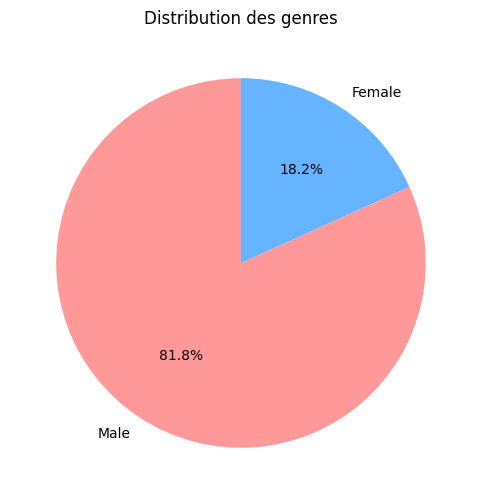

In [35]:
# Distribution des genres
gender_counts = df_cleaned['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
ax.set_title("Distribution des genres")

plt.show()

### II - Analyse Bivarié 

####  Loan_status vs variables numériques

In [37]:
df_cleaned.groupby('Loan_Status').median(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,132.5,360.0,1.0
Y,3812.5,1239.5,127.5,360.0,1.0


status de prêt vs les revenus du demandeurs et revenus du conjoint 

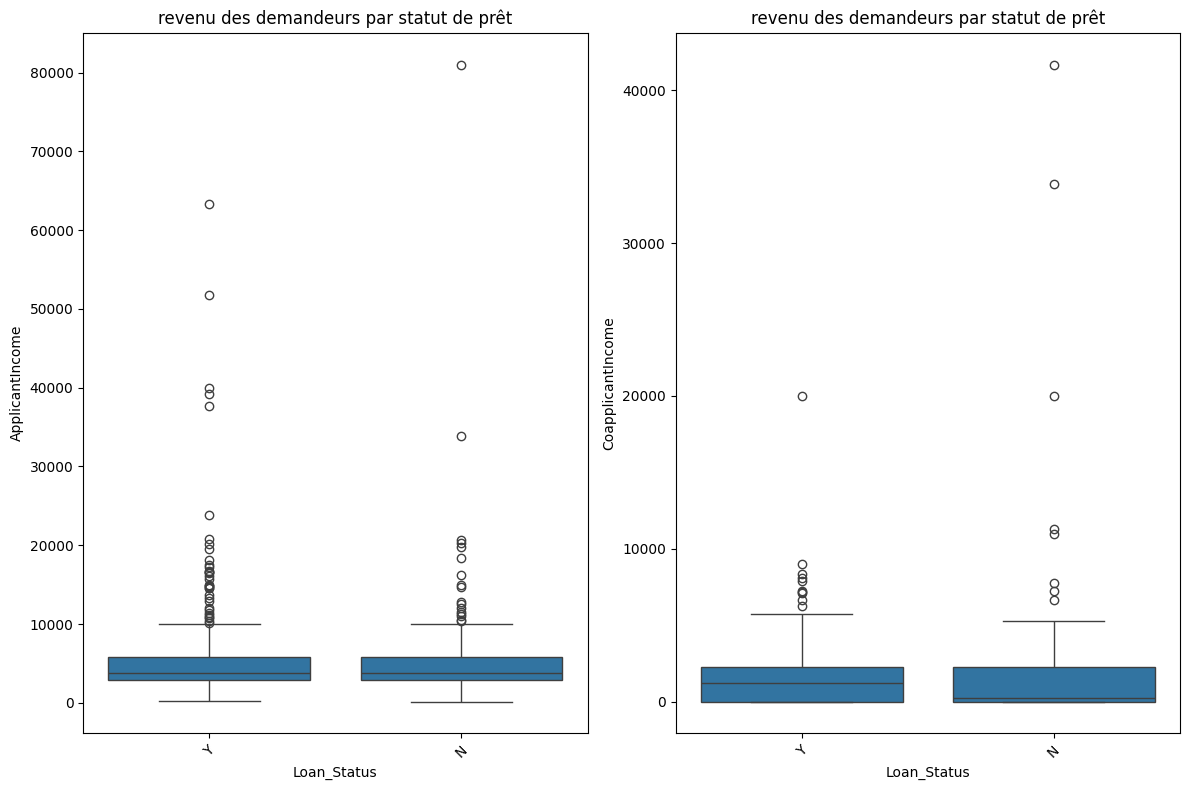

In [39]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df_cleaned)
plt.title('revenu des demandeurs par statut de prêt')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df_cleaned)
plt.title('revenu des demandeurs par statut de prêt')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

status de prêt par montant du prêt et les durée 

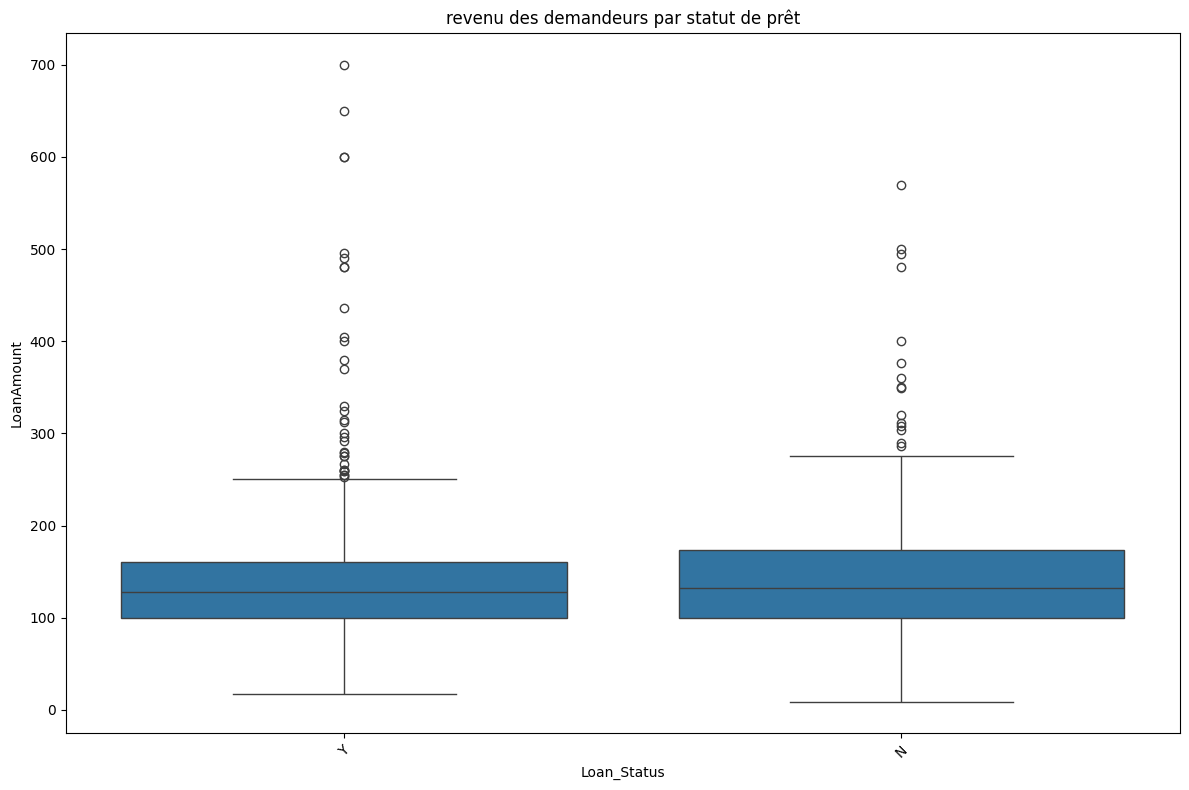

In [41]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='Loan_Status', y='LoanAmount', data=df_cleaned)
plt.title('revenu des demandeurs par statut de prêt')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

####  Loan_status vs variables catégorielles

c:\Users\NAZIFOU\Bank-loan-prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


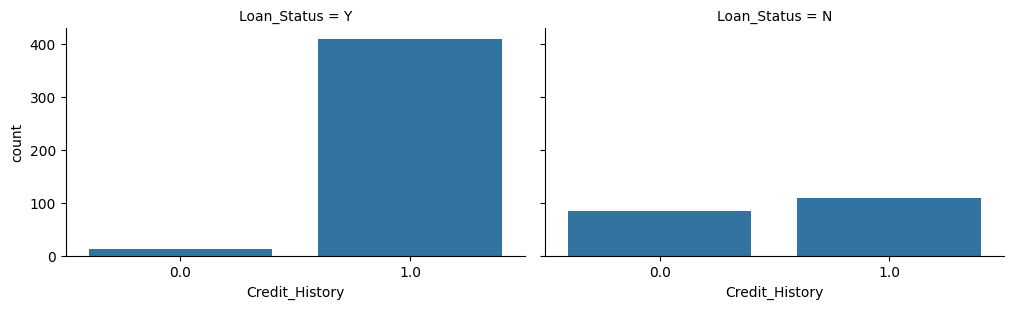

In [20]:
# credit history
grid = sns.FacetGrid(df_cleaned, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

c:\Users\NAZIFOU\Bank-loan-prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


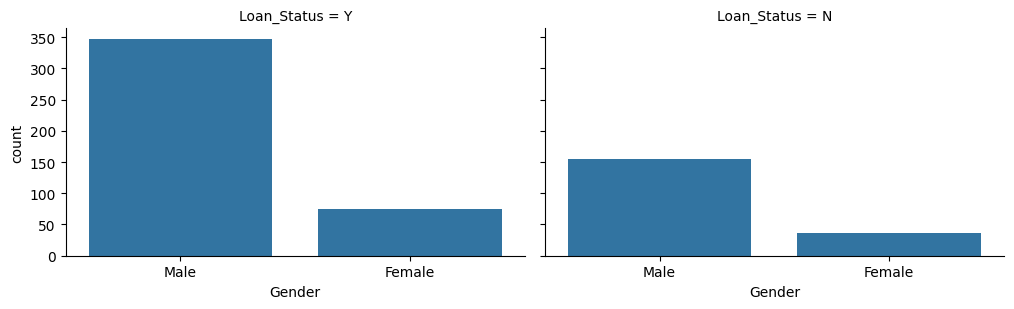

In [21]:
# Sexe 
grid = sns.FacetGrid(df_cleaned, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

c:\Users\NAZIFOU\Bank-loan-prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


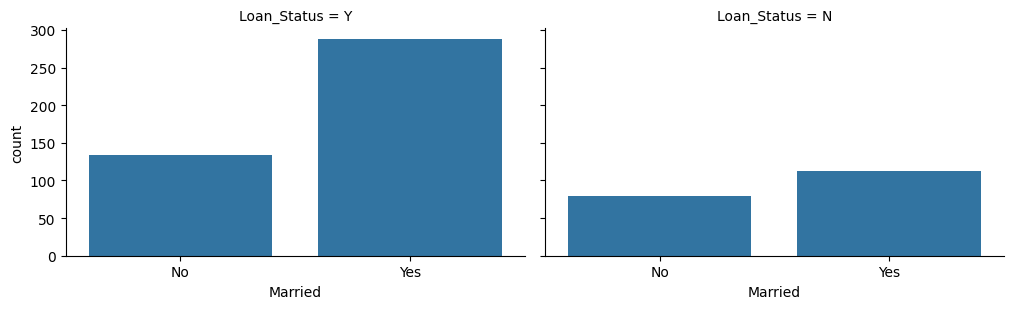

In [22]:
# Marié
grid = sns.FacetGrid(df_cleaned, col='Loan_Status', height=3.2, aspect=1.6)    
grid.map(sns.countplot, 'Married')   

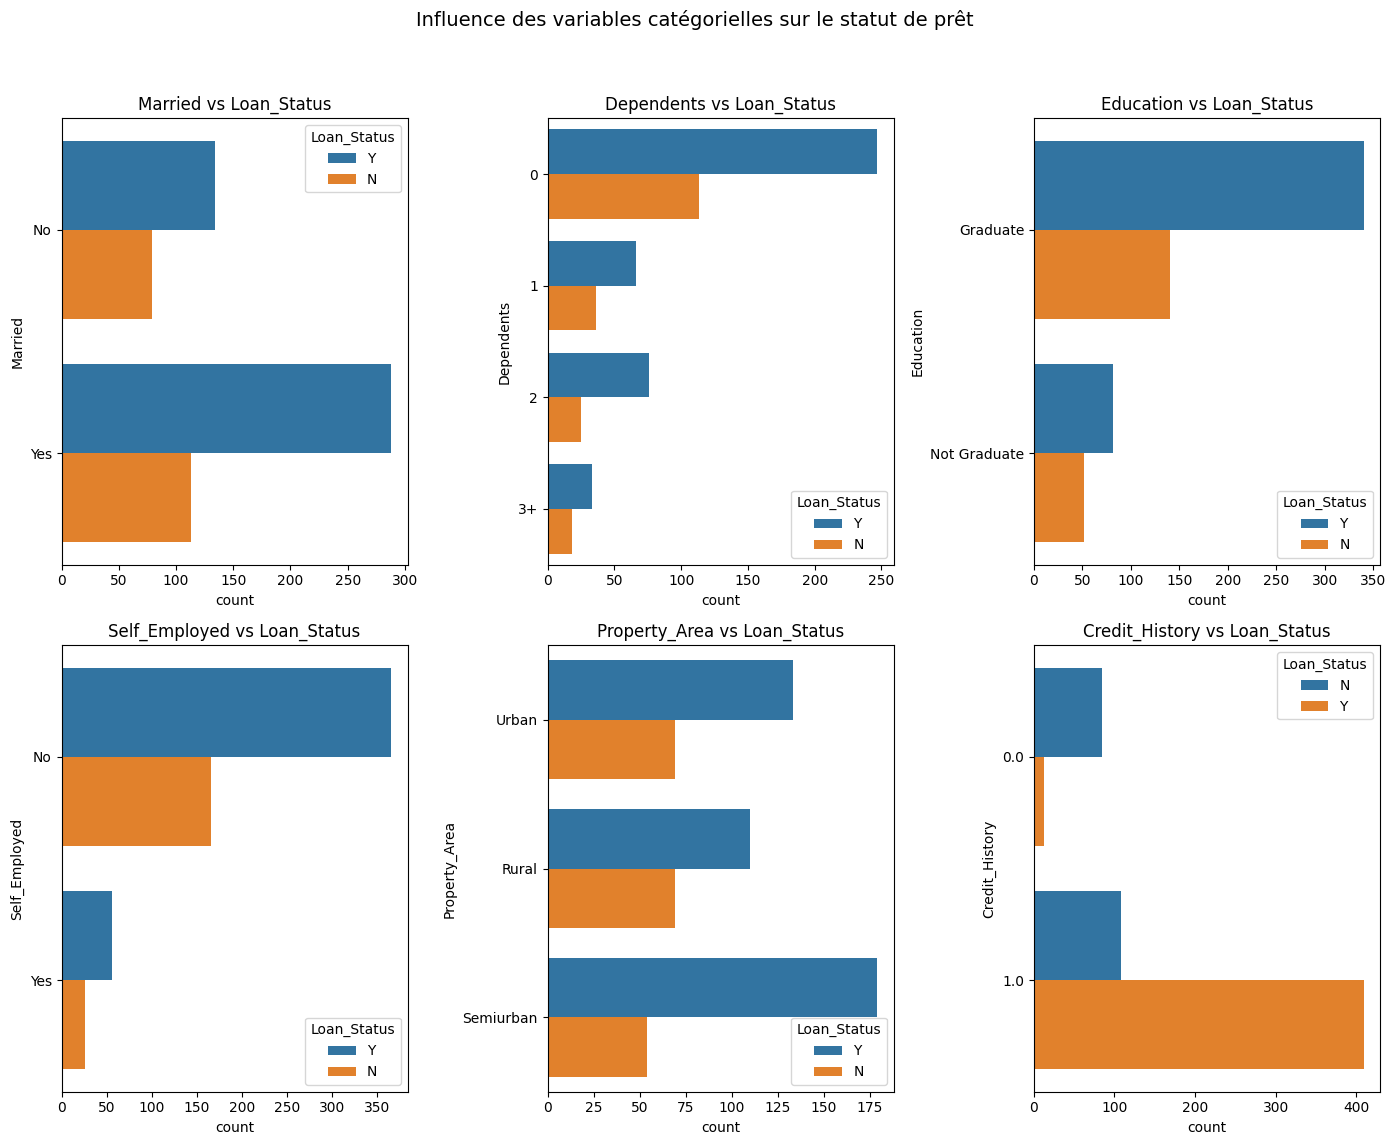

In [45]:
cat_vars = ['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 12))
axes = axes.flatten()  # Aplatir la grille pour éviter les erreurs d'indexation

fig.suptitle('Influence des variables catégorielles sur le statut de prêt', fontsize=14)

for i, var in enumerate(cat_vars):
    sns.countplot(y=df_cleaned[var], hue=df_cleaned['Loan_Status'], ax=axes[i])
    axes[i].set_title(f'{var} vs Loan_Status')

# Supprimer les sous-graphiques vides (si nécessaire)
for j in range(len(cat_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Correlation 

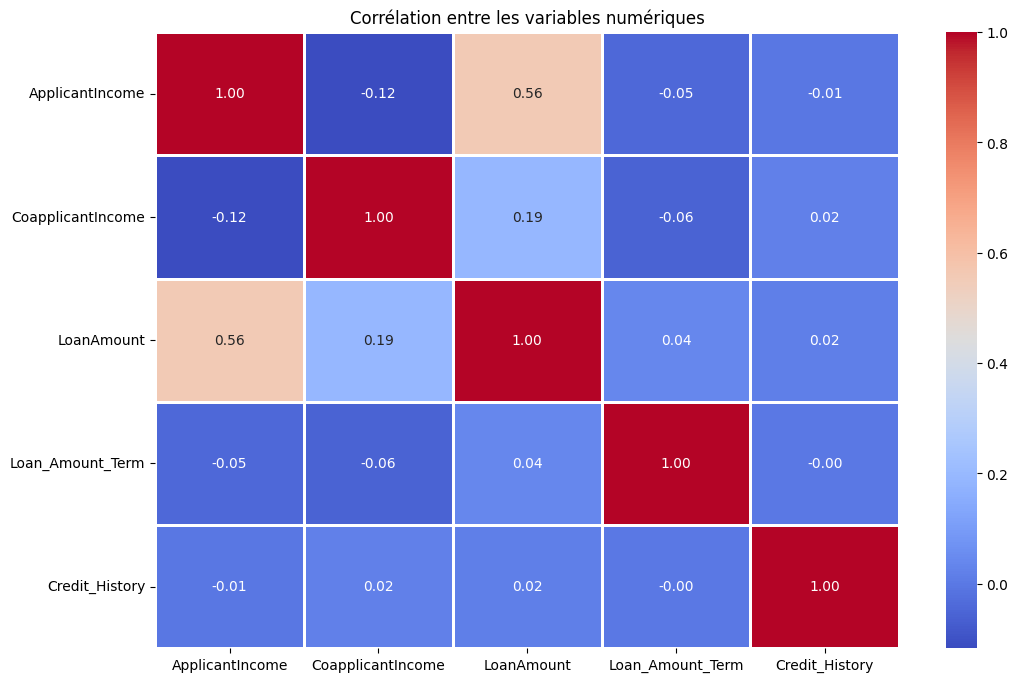

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Corrélation entre les variables numériques')
plt.show()

In [ ]:
def save_cleaned_data(dataframe, path):
    """
    Sauvegarde un DataFrame sous forme de fichier CSV.
    Crée le dossier s'il n'existe pas.
    
    Args:
        dataframe (pd.DataFrame): Le DataFrame à sauvegarder.
        path (str): Le chemin du fichier CSV.
    """
    
    # Extraire le répertoire du fichier
    directory = os.path.dirname(path)
    
    # Créer le dossier s'il n'existe pas
    if directory and not os.path.exists(directory):
        os.makedirs(directory)

    try:
        # Sauvegarde du DataFrame
        dataframe.to_csv(path, index=False)
        print(f"✅ Fichier enregistré avec succès : {path}")
    except Exception as e:
        print(f"❌ Erreur lors de l'enregistrement du fichier : {e}")

In [ ]:
df_cleaned.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
import sys
import os

# Ajouter le dossier parent au chemin d'import
sys.path.append(os.path.abspath(".."))

from cleaning_preprocess_ML.cleaning import datacleaning


In [ ]:
from cleaning_preprocess_ML.cleaning import save_cleaned_data

save_cleaned_data(df_cleaned, '../dataset/data_cleaned.csv')

✅ Fichier enregistré avec succès : ../dataset/data_cleaned.csv
